In [1]:
#loading_all libraries
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import csv
import os

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
df_train=pd.read_csv("C:/Users/hitech services/Downloads/heart_failure_clinical_records_dataset.csv")

In [17]:
df_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
import sweetviz as sv

In [8]:
train_report = sv.analyze(df_train)

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [9]:
#display the report
train_report.show_html('heart_diease_failure_dataset.html')

Report heart_diease_failure_dataset.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [18]:
df_train.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [19]:
df_train['anaemia']=df_train['anaemia'].astype('object')
df_train['diabetes']=df_train['diabetes'].astype('object')
df_train['high_blood_pressure']=df_train['high_blood_pressure'].astype('object')
df_train['sex']=df_train['sex'].astype('object')
df_train['smoking']=df_train['smoking'].astype('object')



In [20]:
import seaborn as sns

In [21]:
#function for missing data
def missing_data(df_train):
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(20))

In [22]:
missing_data(df_train)

,Total,Percent
DEATH_EVENT,0,0.0
time,0,0.0
smoking,0,0.0
sex,0,0.0
serum_sodium,0,0.0
serum_creatinine,0,0.0
platelets,0,0.0
high_blood_pressure,0,0.0
ejection_fraction,0,0.0
diabetes,0,0.0


In [23]:
df_train.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870,0.32107
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208,0.46767
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,0.00000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000,0.00000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000,0.00000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,1.00000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,1.00000


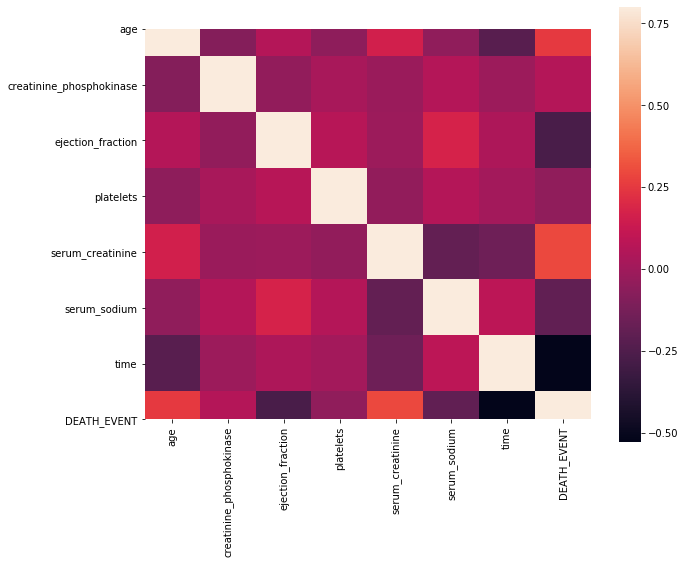

In [24]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

<Figure size 1800x1440 with 0 Axes>

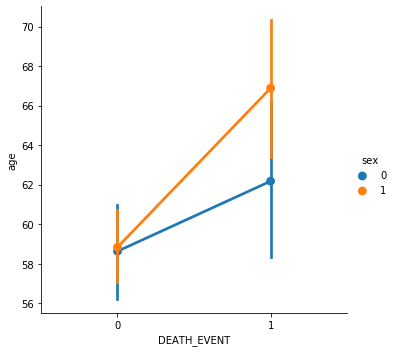

In [25]:
plt.figure(figsize=(25,20))
sns.factorplot(data=df_train,x='DEATH_EVENT',y='age',hue='sex')

<Figure size 1080x720 with 0 Axes>

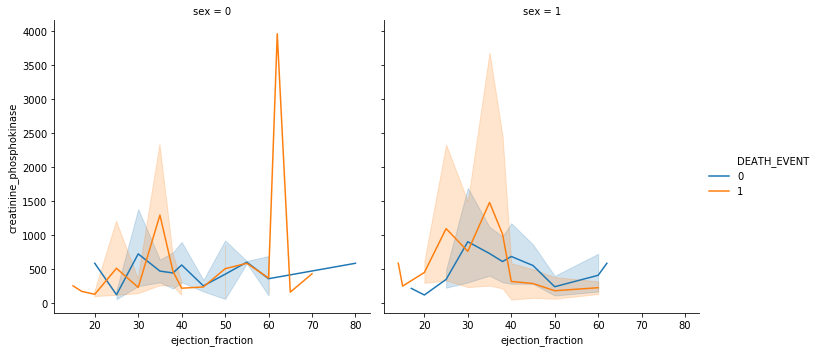

In [26]:
plt.figure(figsize=(15,10))
sns.relplot(x='ejection_fraction', y='creatinine_phosphokinase', data=df_train,
            kind='line', hue='DEATH_EVENT', col='sex')

In [27]:
encoded = pd.get_dummies(df_train)

In [28]:
encoded.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,1,0,1,0,0,1,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,7,1,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,0,1,0,1,1,0,1,0,1,0


In [29]:
dependent_all=encoded['DEATH_EVENT']

In [30]:
independent_all=encoded.drop(['DEATH_EVENT'],axis=1)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(independent_all,dependent_all,test_size=0.3,random_state=100)

In [32]:
log =LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#model on train using all the independent values in df
log_prediction = log.predict(x_train)
log_score= accuracy_score(y_train,log_prediction)
print('Accuracy score on train set using Logistic Regression :',log_score)

Accuracy score on train set using Logistic Regression : 0.8421052631578947


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, log_prediction)

array([[132,  12],
       [ 21,  44]], dtype=int64)

In [35]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,log_prediction)
print("AUC on train using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on train using Logistic Regression : 0.7967948717948717


In [36]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_train, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.63


In [37]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_train, log_prediction))

recall_score on train set : 0.676923076923077


In [38]:
from sklearn.metrics import f1_score
print('F1_sccore on train set :',f1_score(y_train, log_prediction))

F1_sccore on train set : 0.7272727272727272


In [39]:
#model on train using all the independent values in df
log_prediction = log.predict(x_test)
log_score= accuracy_score(y_test,log_prediction)
print('accuracy score on test using Logisitic Regression :',log_score)

accuracy score on test using Logisitic Regression : 0.8222222222222222


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_prediction)

array([[56,  3],
       [13, 18]], dtype=int64)

In [41]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,log_prediction)
print("AUC on test using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on test using Logistic Regression : 0.764898851831602


In [42]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.64


In [43]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_test, log_prediction))

recall_score on train set : 0.5806451612903226


In [44]:
from sklearn.metrics import f1_score
print('F1_sccore on train set :',f1_score(y_test, log_prediction))

F1_sccore on train set : 0.6923076923076923


In [45]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81818182 0.90909091 0.86363636 0.86363636 0.80952381 0.75
 0.75       0.9        0.8        0.85      ]
Mean: 0.8314069264069264
Standard Deviation: 0.05296917140841603


In [52]:
rfc2=RandomForestClassifier(n_estimators=300)
rfc2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 1.0


In [56]:
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)

accuracy score on test using RandomForest  0.8444444444444444


In [57]:
lr = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86363636 0.95454545 0.77272727 0.86363636 0.76190476 0.75
 0.75       0.95       0.8        0.8       ]
Mean: 0.8266450216450216
Standard Deviation: 0.07387756635689138


In [58]:
dec=DecisionTreeClassifier()

In [59]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
#model on train using all the independent values in df
dec_prediction = dec.predict(x_train)
dec_score= accuracy_score(y_train,dec_prediction)
print('Accuracy score on train using Decision Tree :',dec_score)

Accuracy score on train using Decision Tree : 1.0
